# Initial Setup


In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Reading the dataset
df = pd.read_csv('online_advertising_performance_data.csv')

# Data Preprocessing


In [4]:
# print(df.info())
# print(df.describe())
# print(df.shape)
# print(df.columns)

In [5]:
# Changing the campaign_number column to just the number
df['campaign_number'] = df['campaign_number'].str.replace('camp', '')
df['campaign_number'] = df['campaign_number'].astype(int)
print(df['campaign_number'].unique())

[1 2 3]


In [6]:

# Changing User Engagement to numbers
engagement_mapping = {
    'High': 3,
    'Medium': 2,
    'Low': 1
}
df['user_engagement'] = df['user_engagement'].map(engagement_mapping)
print(df['user_engagement'].unique())

[3 1 2]


In [7]:
# Using Label Encoding for banner column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['banner_original'] = df['banner'].copy()
df['banner_encoded'] = label_encoder.fit_transform(df['banner'])

print("Original banner values:", df['banner_original'].unique())
print("Encoded banner values:", df['banner_encoded'].unique())


Original banner values: ['160 x 600' '240 x 400' '300 x 250' '468 x 60' '580 x 400' '670 x 90'
 '728 x 90' '800 x 250']
Encoded banner values: [0 1 2 3 4 5 6 7]


In [8]:
# Using Label Encoding for placement column
df['placement_original'] = df['placement'].copy()
df['placement_encoded'] = label_encoder.fit_transform(df['placement'])
print(df['placement'].unique())

['abc' 'def' 'ghi' 'mno' 'jkl' nan]


In [9]:
# Using Label Encoding for Month column
df['month'] = label_encoder.fit_transform(df['month']) 
print(df['month'].unique())

[0 2 1]


In [10]:
# Removing the last 2 unnamed columns from the dataset
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [11]:
# Handling missing values
df.isnull().sum()
# As there are no missing values, we can proceed with the analysis

month                        0
day                          0
campaign_number              0
user_engagement              0
banner                       0
placement                  413
displays                     0
cost                         0
clicks                       0
revenue                      0
post_click_conversions       0
post_click_sales_amount      0
banner_original              0
banner_encoded               0
placement_original         413
placement_encoded            0
dtype: int64

# Analyzing the Data


## What is the overall trend in user engagement throughout the campaign period?

In [12]:
# Creating a reverse mapping for month names
month_labels = {'April':0, 'May':1, 'June':2}
reverse_map = {v:k for k, v in month_labels.items()}

# Making another column for month names
df['month_name'] = df['month'].map(reverse_map)

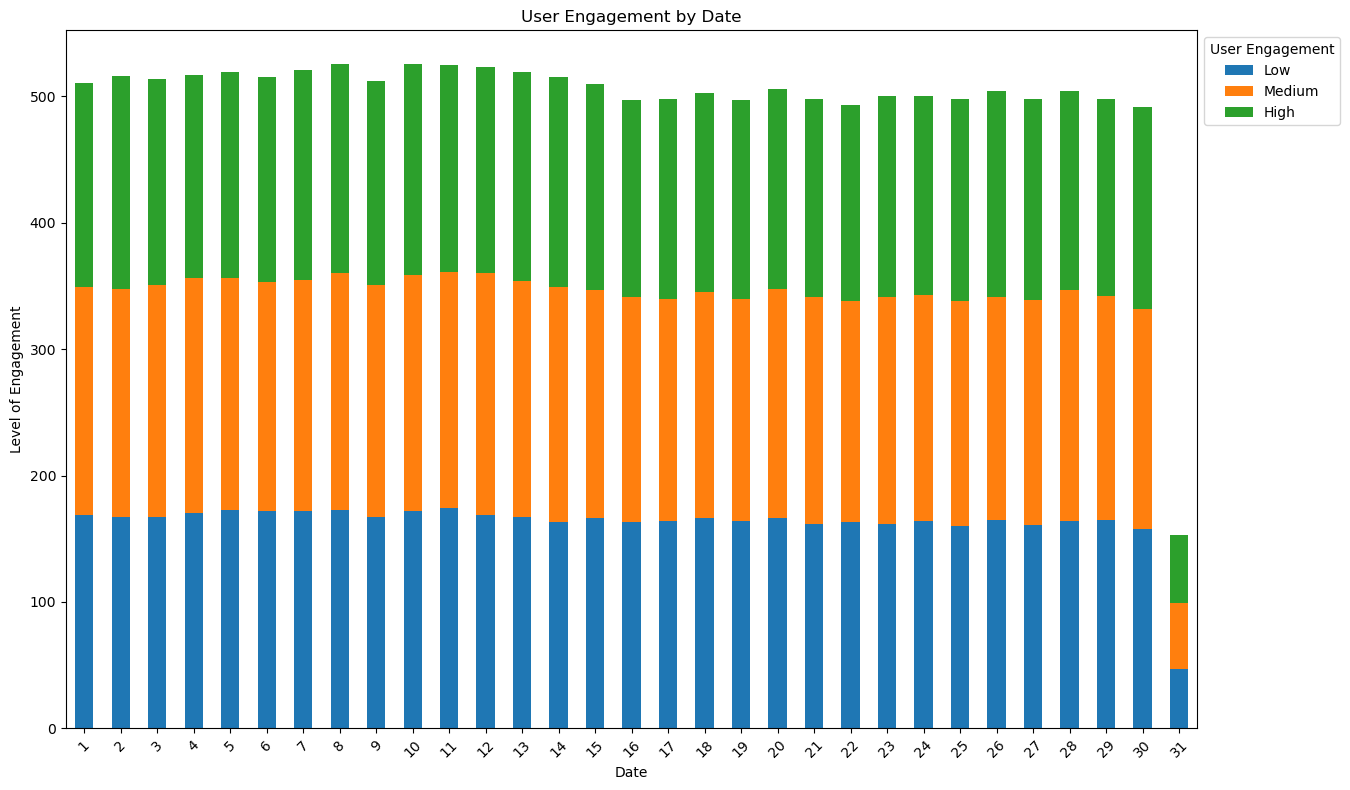

In [13]:
#Creating a visualization of user engagement by date

daily_engagement = df.groupby(['day', 'user_engagement']).size().unstack()

fig, ax = plt.subplots(figsize=(16, 8))
bars = daily_engagement.plot(kind='bar', stacked=True, ax=ax)

ax.set_title('User Engagement by Date')
ax.set_ylabel('Level of Engagement')
ax.set_xlabel('Date')
ax.set_xticklabels(daily_engagement.index, rotation=45)

ax.legend(
    labels=['Low', 'Medium', 'High'], 
    title='User Engagement',
    bbox_to_anchor=(1.0, 1.0),
    loc='upper left'
)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

### 1. Key Observations:
- The stacked bar chart shows a **uniform distribution** of user engagement (Low, Medium, High) across most dates from **1 to 30**.
- Engagement levels remain **fairly consistent** across all three categories, suggesting a stable user response pattern regardless of the calendar day.

---

### 2. Notable Anomaly on Day 31:
- A **drop in engagement** is observed on **Day 31**, where the total number of campaigns is significantly lower.
- This is expected because:
  - **Day 31 only exists in May**.
  - **April and June have 30 days**, so **Day 31 appears only once in the dataset**.
- Hence, the engagement values on the 31st are not comparable to other days that occurred **three times (once in each month)**.

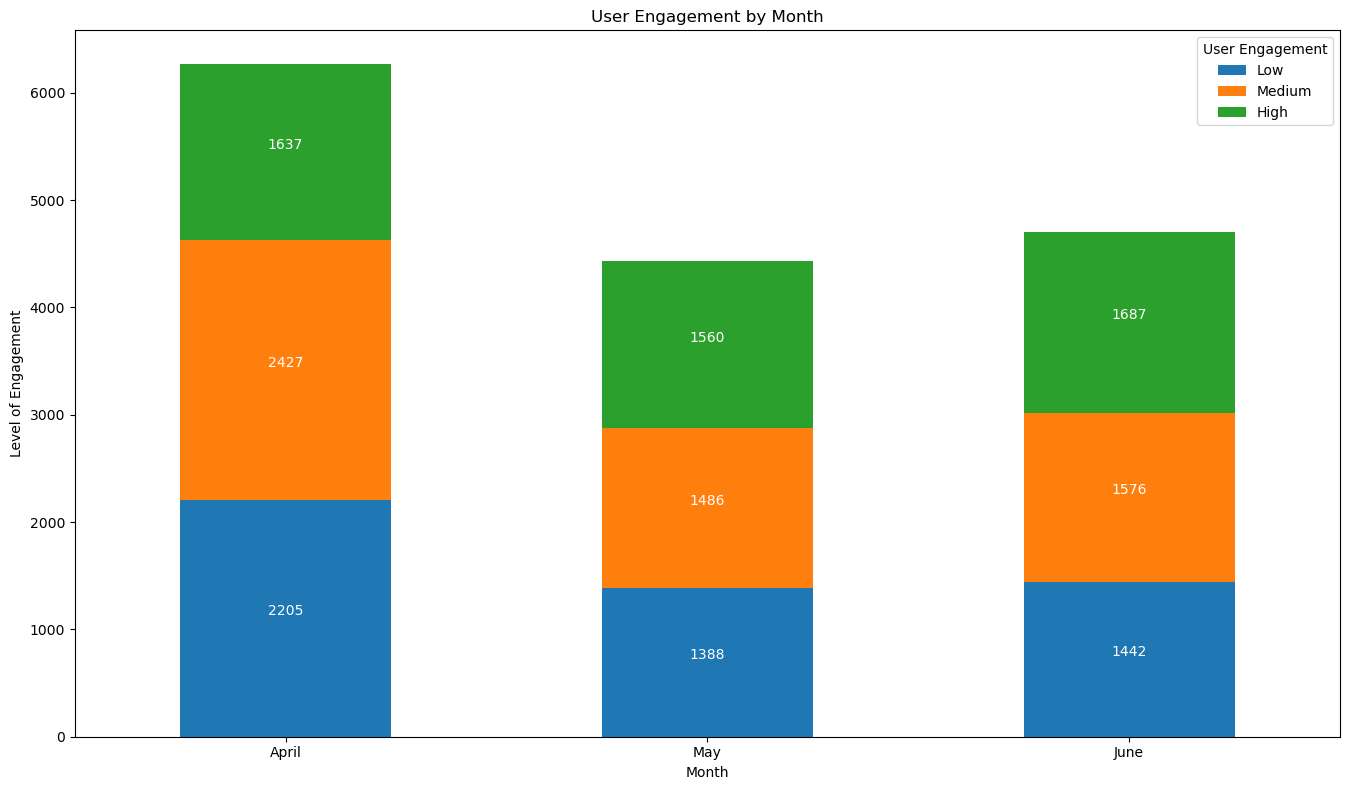

In [14]:
#Creating a visualtization of user engagement by month

monthly_engagement = df.groupby(['month_name', 'user_engagement']).size().unstack()
month_order = ['April', 'May', 'June']
monthly_engagement = monthly_engagement.loc[month_order]

fig,ax = plt.subplots(figsize=(16, 8))
bars = monthly_engagement.plot(kind='bar', stacked=True, ax=ax)

for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if(height > 0):
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + height/2,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10, color='white'
            )

ax.set_title('User Engagement by Month')
ax.set_ylabel('Level of Engagement')
ax.set_xlabel('Month')
ax.set_xticklabels(monthly_engagement.index, rotation=0)

ax.legend(
    labels=['Low', 'Medium', 'High'], 
    title='User Engagement',
    bbox_to_anchor=(1.0, 1.0),
    loc='upper right'
)

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

### 1. Key Observations:
- **April** had the **highest overall engagement** with a total of **6,269 campaigns**, consisting of:
  - **2,205** Low
  - **2,427** Medium
  - **1,637** High

- **May** saw a **significant drop** in engagement with only **4,434 total campaigns**:
  - **1,388** Low
  - **1,486** Medium
  - **1,560** High

- **June** showed a **slight recovery** in engagement with **4,705 campaigns**:
  - **1,442** Low
  - **1,576** Medium
  - **1,687** High

---

### 2. Insights:
- April consistently leads across all three engagement levels, indicating potentially higher campaign activity or better targeting.
- May experienced a dip across all segments, possibly due to strategic shifts, holidays, or external factors.
- June’s **High engagement** slightly surpasses that of April, indicating improved targeting or performance near the end of the quarter.

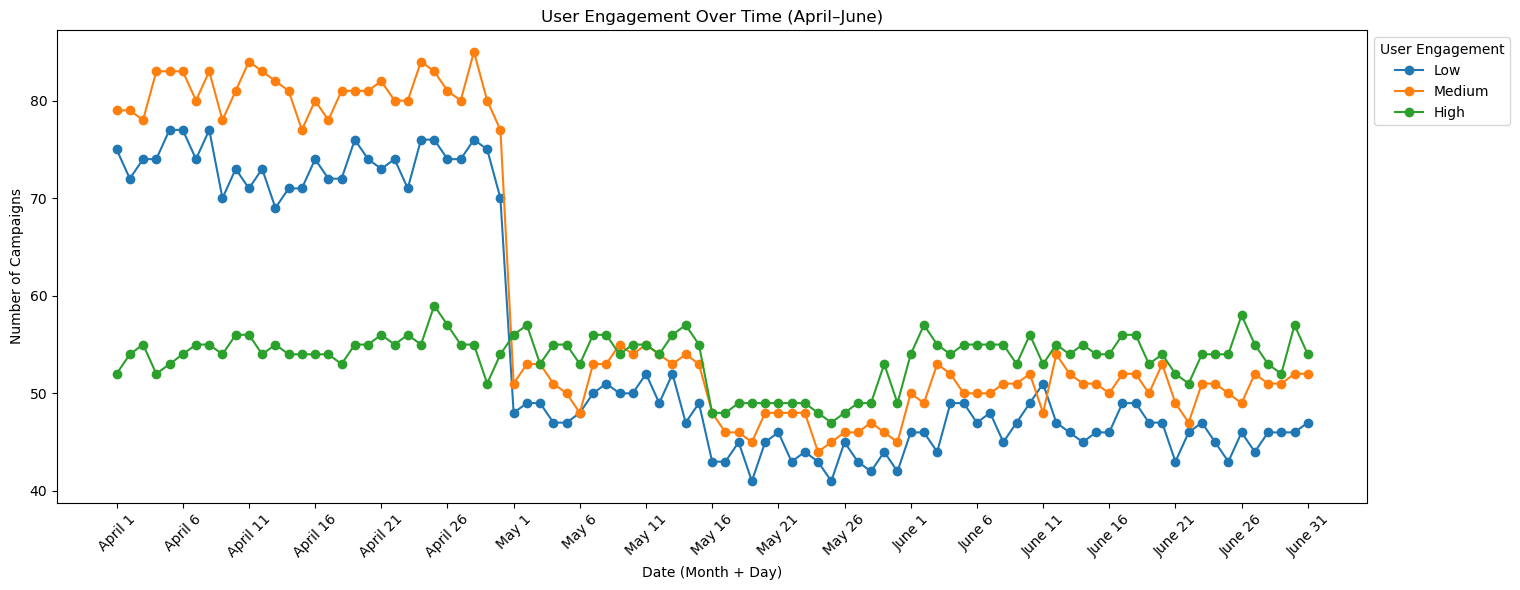

In [15]:
#Creating a visualization of user engagement overtime
month_map = {'April': 4, 'May': 5, 'June': 6}
df['month_day'] = df['month_name'] + ' ' + df['day'].astype(str)

overtime_engagement = df.groupby(['month_day', 'user_engagement']).size().unstack()

#Adding sort key 
overtime_engagement['sort_key'] = overtime_engagement.index.map(
    lambda x: f"{month_map[x.split()[0]]}-{int(x.split()[1]):02d}"
)

#Sorting the index
overtime_engagement = overtime_engagement.sort_values('sort_key').drop(columns='sort_key')

fig, ax = plt.subplots(figsize=(18, 6))

overtime_engagement.plot(kind='line', marker='o', ax=ax)

ax.set_title('User Engagement Over Time (April–June)')
ax.set_xlabel('Date (Month + Day)')
ax.set_ylabel('Number of Campaigns')

#Fewer ticks for better readability
ax.set_xticks(range(0, len(overtime_engagement), 5)) 
ax.set_xticklabels(overtime_engagement.index[::5], rotation=45)

ax.legend(['Low', 'Medium', 'High'], title='User Engagement',
          bbox_to_anchor=(1.0, 1.0), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


## How does the size of the ad (banner) impact the number of clicks generated?

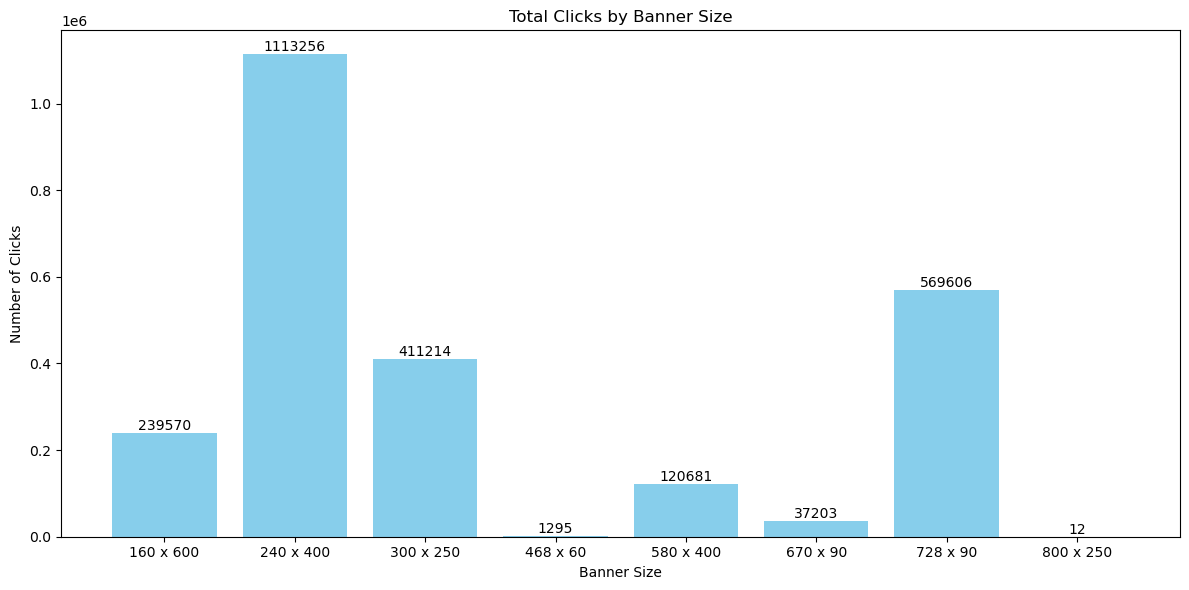

In [16]:
banner_clicks = df.groupby('banner_original')['clicks'].sum()

plt.figure(figsize=(12, 6))
bars = plt.bar(banner_clicks.index, banner_clicks.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.title('Total Clicks by Banner Size')
plt.xlabel('Banner Size')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 1. Key Observations:
- The **banner size "240 x 400"** received the **highest number of clicks** (~1.1 million), making it the most effective size in terms of user interaction.
- Other high-performing banner sizes include:
  - `"728 x 90"` with ~569k clicks
  - `"300 x 250"` with ~411k clicks
  - `"160 x 600"` with ~239k clicks
- Some banner sizes performed **poorly**, such as:
  - `"468 x 60"` (~1.3k clicks)
  - `"800 x 250"` (only **12 clicks**)
  - `"670 x 90"` (~37k clicks)

---

### 2. Interpretation:
- The **click distribution is not uniform** across banner sizes.
- While larger and more standard sizes generally perform better, this isn't always the case.

---

### 3. Influencing Factors:
The variation in total clicks by banner size may be influenced by:
- **Placement** (e.g., homepage, sidebar, app screen)
- **Day or Date** (weekends vs weekdays, seasonal traffic)
- **User Engagement Level**
- **Device Type** (some sizes may render better on mobile/desktop)

## Which publisher spaces (placements) yielded the highest number of displays and clicks?

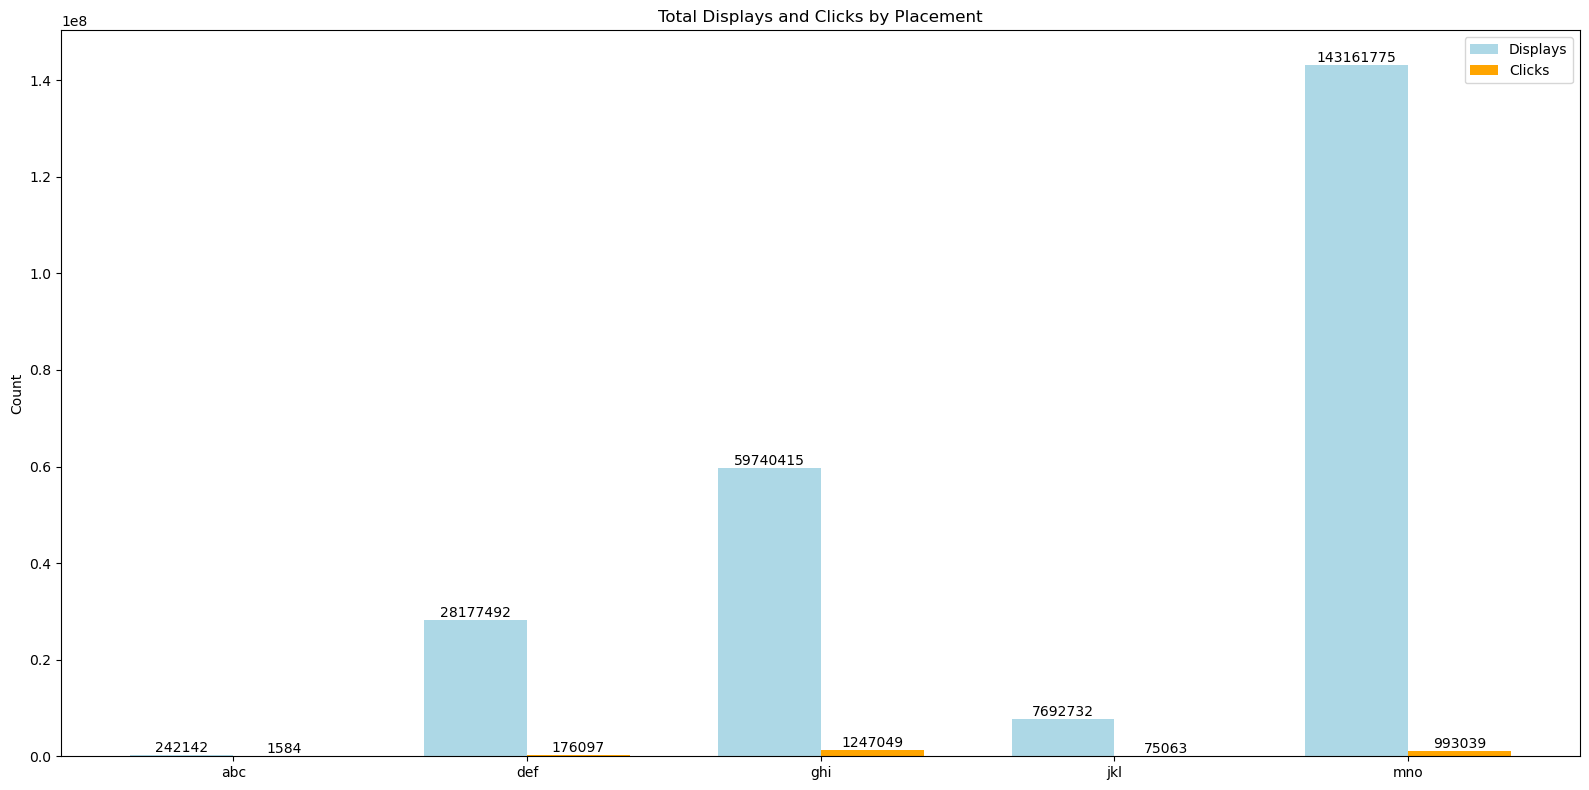

In [17]:
#Creating a visualization of displays and clicks by placement
placement_stats = df.groupby('placement_original')[['displays', 'clicks']].sum()

labels = placement_stats.index.tolist()
displays = placement_stats['displays'].values
clicks = placement_stats['clicks'].values

x = np.arange(len(labels)) 
width = 0.35 

fig,ax = plt.subplots(figsize=(16,8))
bars1 = ax.bar(x - width/2, displays, width, label='Displays', color='lightblue')
bars2 = ax.bar(x + width/2, clicks, width, label='Clicks', color='orange')

for bar in bars1:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{int(height)}', 
        ha='center', va='bottom', fontsize=10
    )

for bar in bars2:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{int(height)}', 
        ha='center', va='bottom', fontsize=10
    )

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0)
ax.set_ylabel('Count')
ax.set_title('Total Displays and Clicks by Placement')
ax.legend()

plt.tight_layout()
plt.show()

**mno** had the highest number of displays, while **ghi** recorded the highest number of clicks. In contrast, **abc** had the lowest number of both displays and clicks.

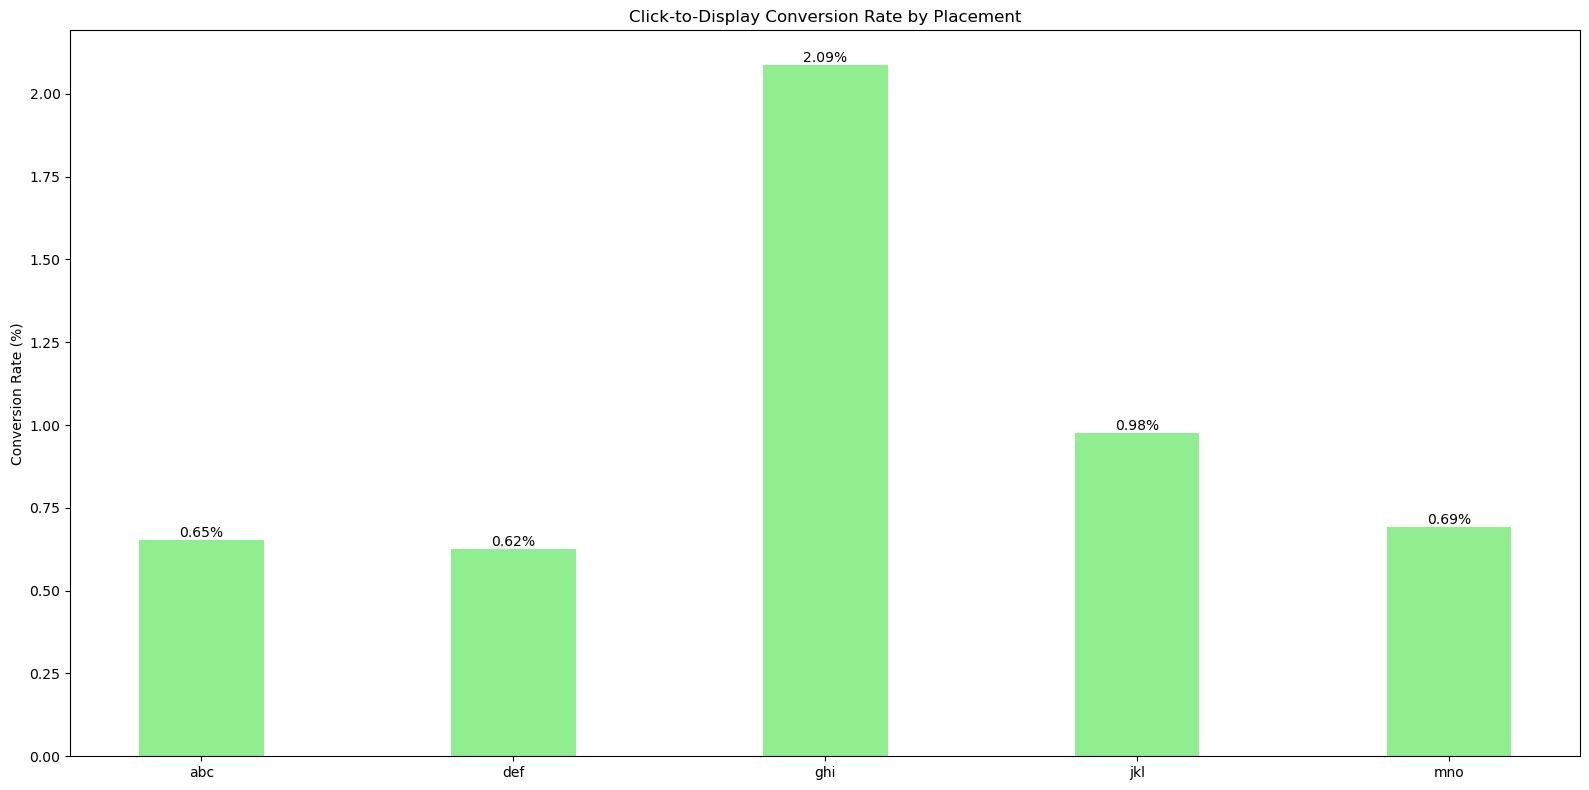

In [18]:
# Creating a visualization of conversion rates by placement
placement_stats = df.groupby('placement_original')[['displays', 'clicks']].sum()
placement_stats['conversion_rate'] = (
    placement_stats['clicks'] / placement_stats['displays']
) * 100

labels = placement_stats.index.tolist()
conversion_rates = placement_stats['conversion_rate'].values
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(16, 8))
bars = ax.bar(x, conversion_rates, color='lightgreen', width=0.4)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{height:.2f}%', 
        ha='center', va='bottom', fontsize=10
    )

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, ha='center')
ax.set_ylabel('Conversion Rate (%)')
ax.set_title('Click-to-Display Conversion Rate by Placement')

plt.tight_layout()
plt.show()

**ghi** achieved the highest conversion rate, whereas **def** had the lowest.

## Is there a correlation between the cost of serving ads and the revenue generated from clicks?

In [19]:
# Generating a summary of cost and revenue dataframes
print(df[['cost', 'revenue']].describe())

               cost       revenue
count  15408.000000  15408.000000
mean      11.370262     17.929943
std       45.369499     96.781834
min        0.000000      0.000000
25%        0.024000      0.000000
50%        0.339850      0.483950
75%        2.536225      3.839800
max      556.704800   2096.211600


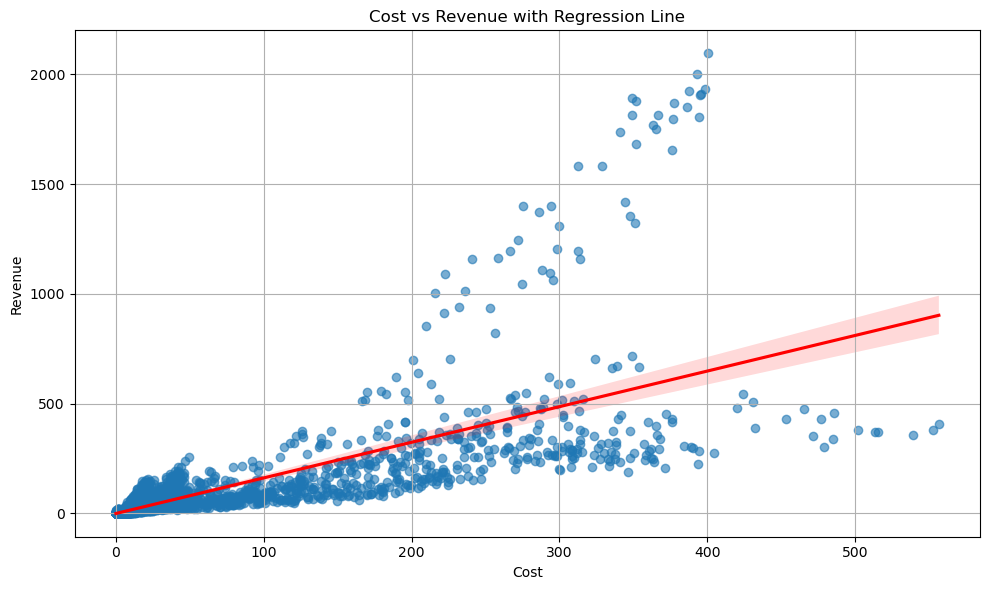

In [20]:

plt.figure(figsize=(10, 6))
sns.regplot(x='cost', y='revenue', data=df, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title('Cost vs Revenue with Regression Line')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
#Using Pearson correlation to find the correlation between cost and revenue
correlation = df['cost'].corr(df['revenue'])
print(f"Pearson correlation between cost and revenue: {correlation:.2f}")

Pearson correlation between cost and revenue: 0.76


### 1. Pearson Correlation Coefficient
- **Value:** `0.76`
- Indicates a **strong positive linear correlation** between the cost of serving ads and the revenue generated from clicks.
- **Interpretation:** As **cost increases**, **revenue generally increases** as well — but not in a perfectly linear manner.

---

### 2. Regression Plot Observations
- The **red line** represents the linear regression line (line of best fit).
- The **shaded red region** is the **95% confidence interval**, reflecting uncertainty around the predicted regression line.
- A tighter band would indicate higher certainty in the trend; here, the **moderate spread** suggests variability in the data.

---

### 3. Scatter Distribution Insights
- The plot shows a **wide spread of data points** around the regression line.
- This suggests that **other variables** may be influencing revenue beyond just cost:
  - `Placement` (e.g., website, app)
  - `Banner size`
  - `User engagement` (low, medium, high)
  - `Temporal factors` like `month`, `day`, or campaign duration

---

### 4. Outliers & Clusters
- Some **outlier points** show high revenue at lower costs.
- These could be examples of **efficient campaigns** or **highly effective placements**.

## What is the average revenue generated per click for Company X during the campaign period?

In [22]:
#Calculating the average revenue per click for each individual campaign
revenue_per_click_by_campaign = df.groupby('campaign_number').agg(
    total_revenue=('revenue', 'sum'),
    total_clicks=('clicks', 'sum')
)

revenue_per_click_by_campaign['avg_revenue_per_click'] = (
    revenue_per_click_by_campaign['total_revenue'] / revenue_per_click_by_campaign['total_clicks']
).round(3)

revenue_per_click_by_campaign = revenue_per_click_by_campaign.reset_index()
print(revenue_per_click_by_campaign)

   campaign_number  total_revenue  total_clicks  avg_revenue_per_click
0                1    230535.3563       1409136                  0.164
1                2     34890.4153        881158                  0.040
2                3     10838.7905        202543                  0.054


In [23]:
#Calculating the average revenue per click over the entire campaign period
average_revenue_per_click = (
    df['revenue'].sum() / df['clicks'].sum()
).round(3)
print(average_revenue_per_click)

0.111


- The **average revenue per click** across the entire campaign period was approximately **`0.111`**.
- Breaking it down by campaign:
  - **Campaign 1:** `0.164`
  - **Campaign 2:** `0.040`
  - **Campaign 3:** `0.054`

- These values indicate a **significant variation in campaign performance**, with Campaign 1 generating much higher revenue per click compared to the others.

## Which campaigns had the highest post-click conversion rates?

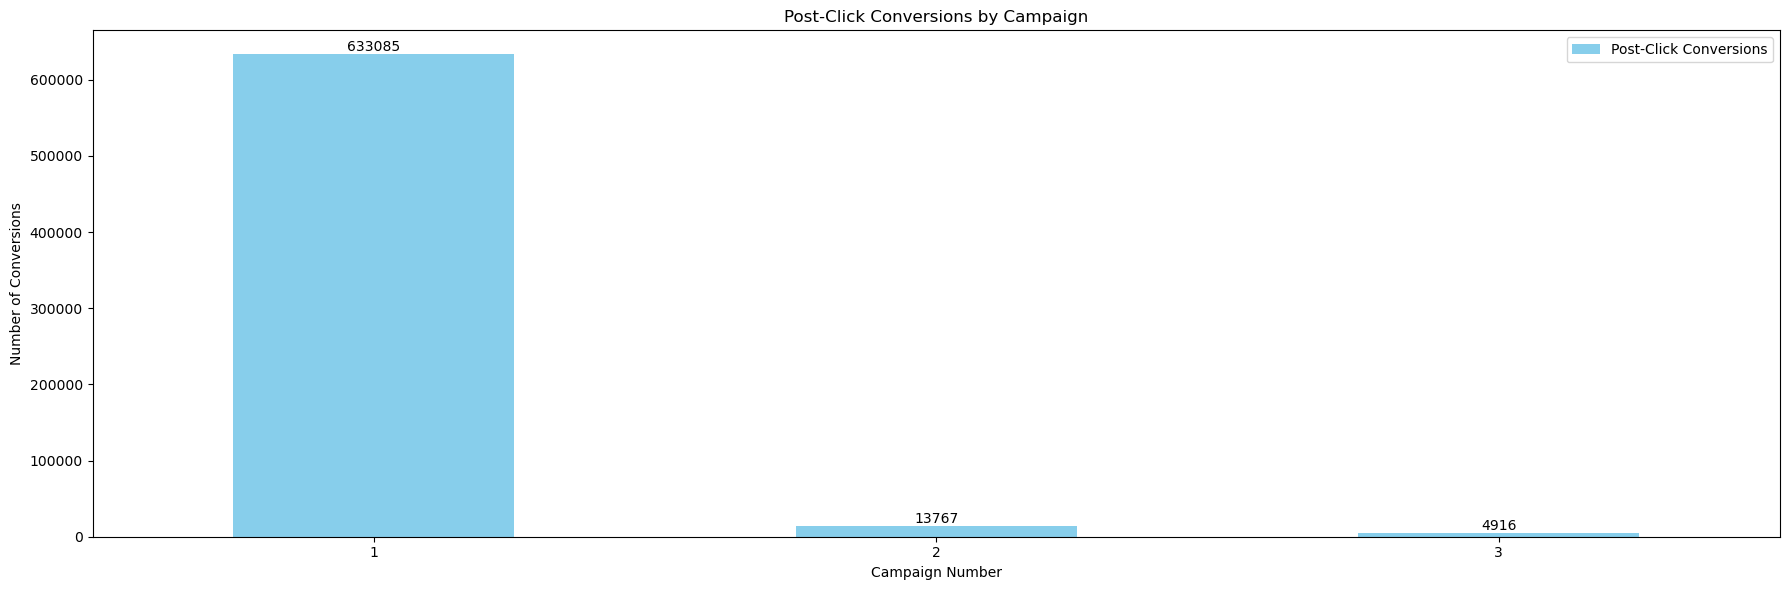

In [24]:
#Creating a visualization of post-click conversions by campaign
campaign_conversion = df.groupby('campaign_number')['post_click_conversions'].sum()

fig, ax = plt.subplots(figsize=(18, 6))
campaign_conversion.plot(kind='bar', ax=ax, color='skyblue')
bars = ax.patches

ax.set_title('Post-Click Conversions by Campaign')
ax.set_ylabel('Number of Conversions')
ax.set_xlabel('Campaign Number')

ax.set_xticks(range(len(campaign_conversion)))
ax.set_xticklabels(campaign_conversion.index, rotation=0)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
            ha='center', va='bottom', fontsize=10)

ax.legend(['Post-Click Conversions'], loc='upper right')

plt.tight_layout()
plt.show()


The total number of **post-click conversions** for each campaign is as follows:
- **Campaign 1:** `633,085`
- **Campaign 2:** `13,767`
- **Campaign 3:** `4,916`

Campaign 1 significantly outperformed the others in terms of post-click conversions, indicating a much higher **conversion volume** compared to Campaigns 2 and 3.

## Are there any specific trends or patterns in post-click sales amounts over time?

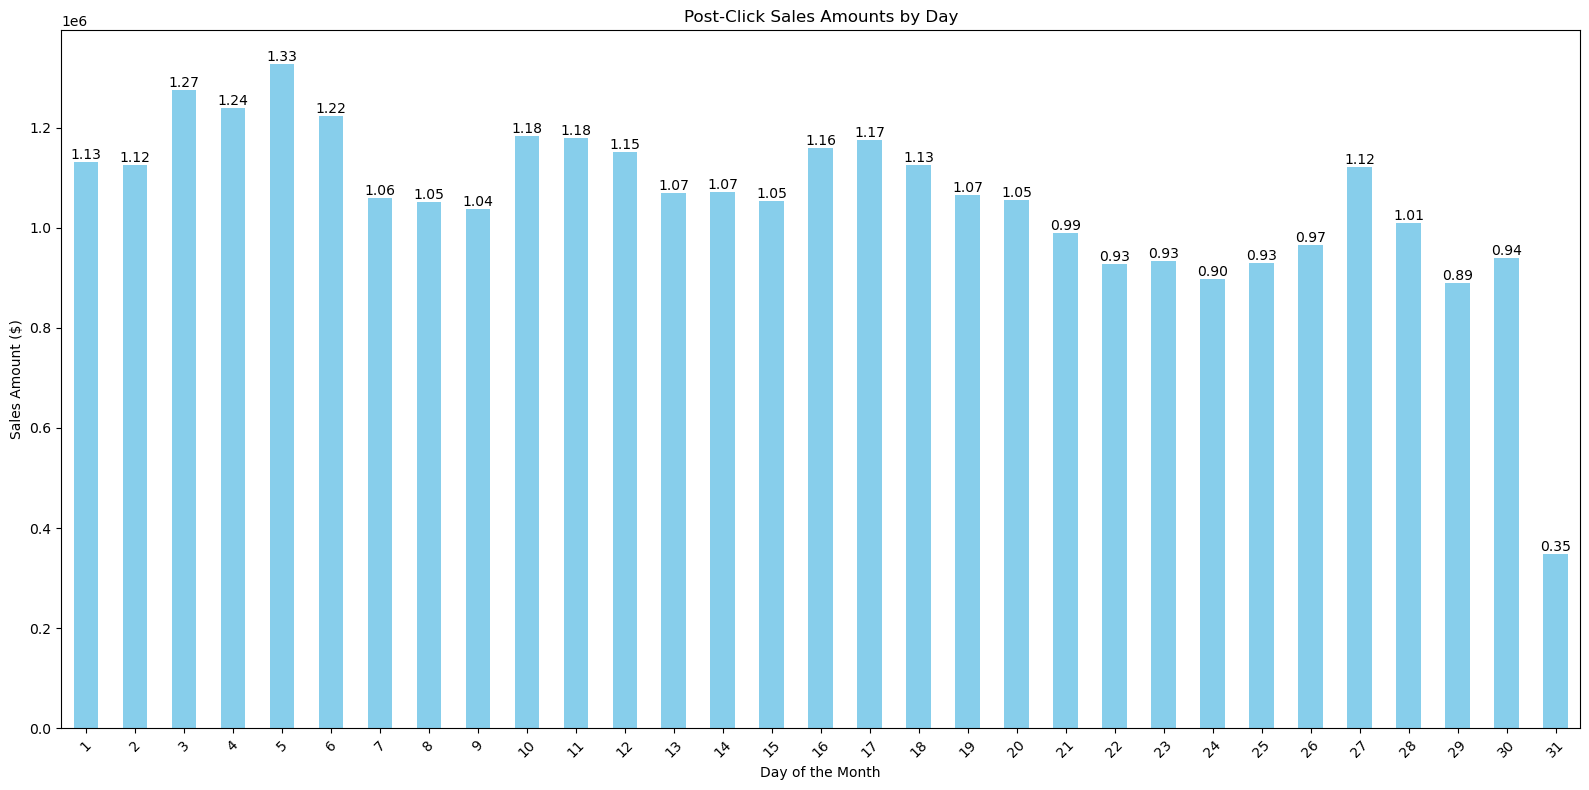

In [25]:
#Creating a visulization of post-click sales amounts vs day
post_click_sales_daily = df.groupby('day')['post_click_sales_amount'].sum()

fid, ax = plt.subplots(figsize=(16, 8))
bars = post_click_sales_daily.plot(kind='bar', ax=ax, color = 'skyblue')

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{(height/1e6):,.2f}',
        ha='center', va='bottom', fontsize=10, color='black'
    )

ax.set_title('Post-Click Sales Amounts by Day')
ax.set_xlabel('Day of the Month')
ax.set_ylabel('Sales Amount ($)')
ax.set_xticks(range(len(post_click_sales_daily)))
ax.set_xticklabels(post_click_sales_daily.index, rotation=45)

plt.tight_layout()
plt.show()

## Peak Performance Days

- **Highest Sales Day:**  
  **Day 5** recorded the **highest cumulative sales** with **$1.33 million**, making it the strongest performing day across the campaign period.

- **Top Performing Period:**  
  **Days 3–6** consistently delivered strong results, each exceeding **$1.20 million** in sales.

- **Secondary Strong Days:**  
  **Days 10–12** and **Days 16–17** also maintained solid performance, with daily sales ranging from **$1.15 to $1.18 million**.

---

## Monthly Day Performance Patterns

- **Early Month Strength (Days 1–6):**  
  Robust cumulative performance with an **average of ~$1.22 million** per day.

- **Mid-Month Consistency (Days 7–20):**  
  Stable daily sales ranging from **$1.04 million to $1.18 million**.

- **Late Month Variation (Days 21–30):**  
  Mixed results observed, with sales fluctuating between **$0.89 million and $1.12 million**.

---

## Performance Metrics

- **Revenue Range:** `$0.35M – $1.33M` per day  
- **Average Daily Sales:** `~$1.05 million`  
- **Total Cumulative Revenue (3 Months):** `~$32.5 million`

---

## Notable Observations

- **Most Consistent High Performers:**  
  **Days 5, 10, 11, 16, and 17** — all recorded **> $1.16 million** in daily sales.

- **Lowest Performance Day:**  
  **Day 31** with only **$0.35 million** — likely due to its appearance in **only one month (May)**.

- **End-of-Month Decline:**  
  **Days 29–31** show a noticeable drop in performance, possibly due to **budget constraints** or **lower user activity** near month-end.


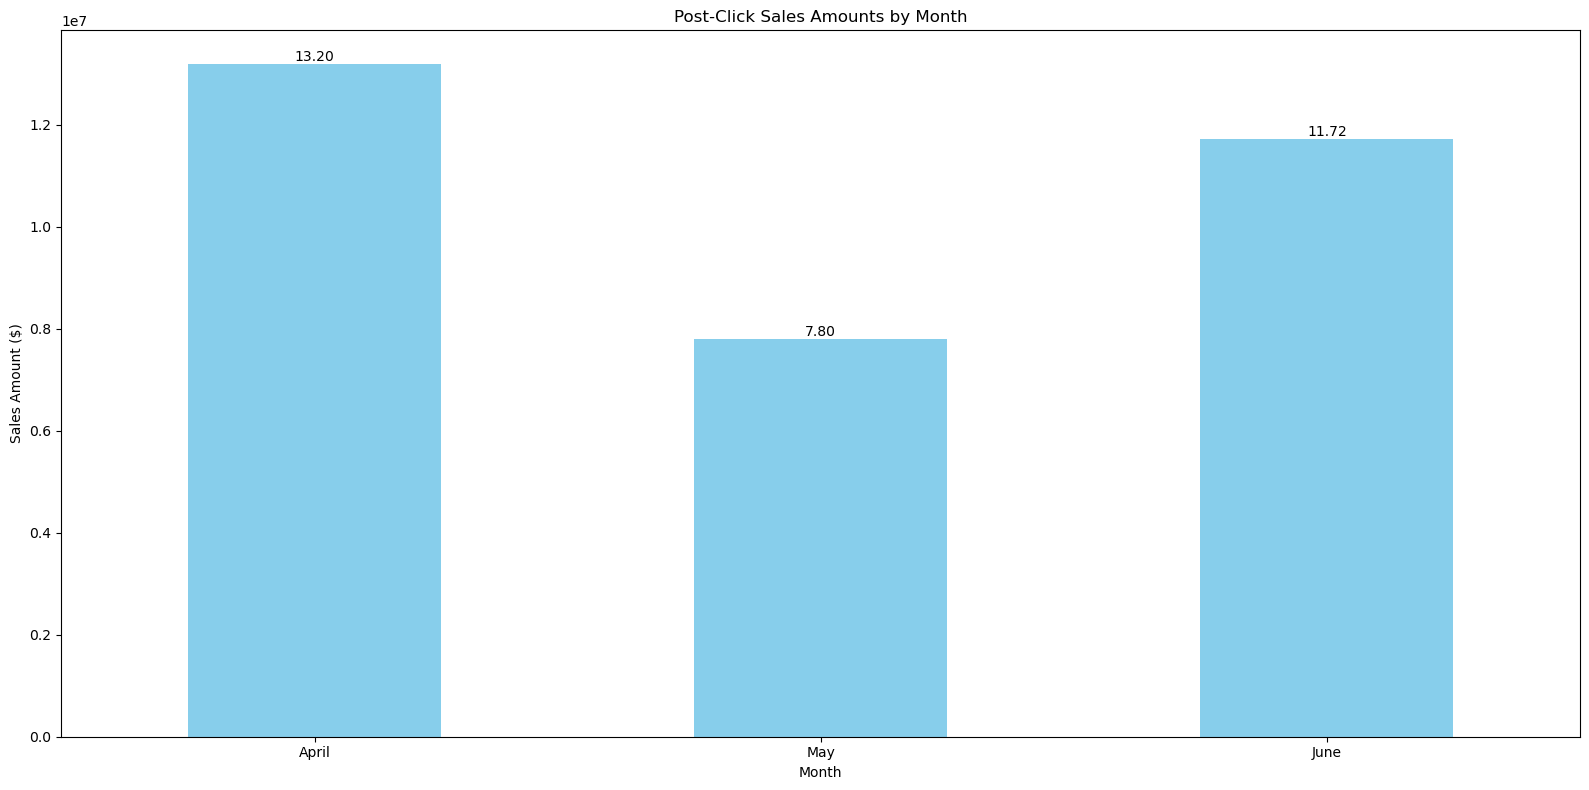

In [26]:
#Creating a visulization of post-click sales amounts vs month
post_click_sales_monthly = df.groupby('month_name')['post_click_sales_amount'].sum()


month_order = ['April', 'May', 'June']
post_click_sales_monthly = post_click_sales_monthly.loc[month_order]

fig, ax = plt.subplots(figsize=(16, 8))

bars = post_click_sales_monthly.plot(kind='bar', ax=ax, color='skyblue')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{(height/1e6):,.2f}',
        ha='center', va='bottom', fontsize=10, color='black'
    )

ax.set_title('Post-Click Sales Amounts by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Sales Amount ($)')
ax.set_xticks(range(len(post_click_sales_monthly)))
ax.set_xticklabels(post_click_sales_monthly.index, rotation=0)

plt.tight_layout()
plt.show()



## Monthly Performance

- **April:** $13.20 million — *Highest performing month*  
- **May:** $7.80 million — *Lowest performing month*  
- **June:** $11.72 million — *Strong recovery month*

---

## Performance Trends

- **April Dominance:**  
  April generated **69% more revenue** than May and **13% more** than June.

- **May Decline:**  
  Revenue dropped by **41%** compared to April, marking the lowest performance.

- **June Recovery:**  
  Sales rebounded with a **50% increase over May**, showing strong recovery potential.

---

## Performance Metrics

- **Total Revenue (3 Months):** $32.72 million  
- **Average Monthly Revenue:** $10.91 million  
- **Performance Range:** $7.80 million to $13.20 million  
- **Variance:** 41% difference between the highest and lowest performing months

---

## Notable Observations

- **Seasonal Pattern:**  
  Revenue fluctuated significantly from month to month, suggesting seasonal or campaign-specific factors influenced performance.

- **Recovery Strength:**  
  June’s performance rebounded strongly after May’s dip, indicating potential for future consistency.

- **Volatility:**  
  A 41% variance between months highlights the need to investigate contributing factors to these fluctuations.


       post_click_sales_amount
count                91.000000
mean             359512.334104
std               98730.279042
min              177379.888700
25%              272372.703600
50%              343034.847900
75%              440734.126500
max              575301.402800


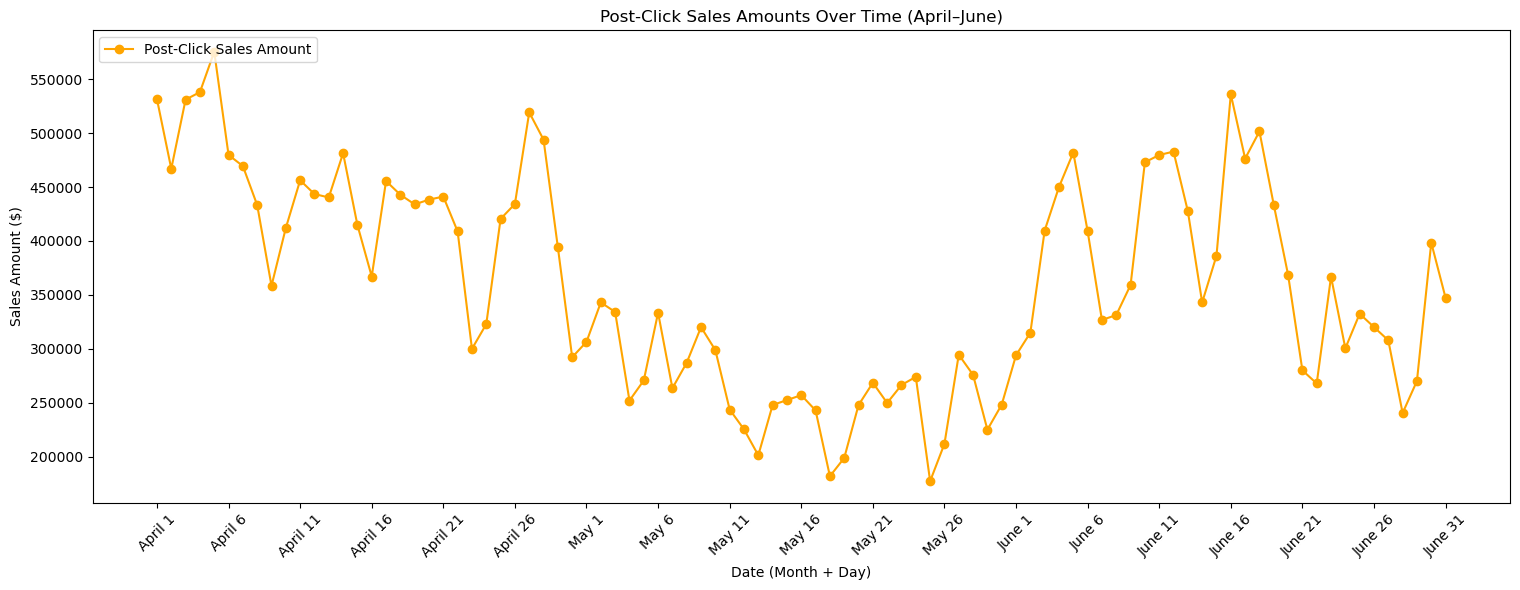

In [27]:
#Creating a visulization of post-click sales amounts overtime

month_map = {'April': 4, 'May': 5, 'June': 6}
df['month_day'] = df['month_name'] + ' ' + df['day'].astype(str)

overtime_sales = df.groupby('month_day')['post_click_sales_amount'].sum()

sort_key = overtime_sales.index.map(
    lambda x: f"{month_map[x.split()[0]]}-{int(x.split()[1]):02d}"
)

overtime_sales = overtime_sales.to_frame()
overtime_sales['sort_key'] = sort_key

overtime_sales = overtime_sales.sort_values('sort_key').drop(columns='sort_key')

print(overtime_sales.describe())

fig, ax = plt.subplots(figsize=(18, 6))
overtime_sales.plot(kind='line', marker='o', ax=ax, color='orange')
ax.set_title('Post-Click Sales Amounts Over Time (April–June)')
ax.set_xlabel('Date (Month + Day)')
ax.set_ylabel('Sales Amount ($)')
ax.set_xticks(range(0, len(overtime_sales), 5))
ax.set_xticklabels(overtime_sales.index[::5], rotation=45)
ax.legend(['Post-Click Sales Amount'], loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


## Peak Performance Days

- **Highest Single-Day Sales:**  
  Top recorded values around **$575,300**, notably in early April and mid-June.

- **Consistent High Performers:**  
  Early April (1st–6th) consistently showed strong performance, often exceeding **$450,000**.

- **Secondary Peaks:**  
  Late April and early June recorded notable spikes, including values in the **$490,000–$520,000** range.

---

## Monthly Performance Patterns

- **April:**  
  Strong start with high volatility, ranging from approximately **$300,000 to $575,000**.

- **May:**  
  Notable decline with the lowest performance period, dipping to **$177,380**, and generally ranging between **$180,000–$300,000**.

- **June:**  
  Marked recovery with increasing volatility, reaching up to **$540,000** and maintaining values above **$400,000**.

---

## Performance Trends

- **April Decline:**  
  Clear downward trend observed from early April peaks to late April dips.

- **May Stagnation:**  
  Consistently low-performing period with limited fluctuation and minimal growth.

- **June Recovery:**  
  Strong upward trend with greater day-to-day variability and return to peak performance levels.

---

## Notable Observations

- **Volatility Patterns:**  
  April and June showed **high daily variability**, while May remained **stable at lower values**.

- **Seasonal Impact:**  
  A discernible seasonal pattern emerges — a **spring decline** followed by an **early summer recovery**.

- **Performance Range:**  
  Daily sales ranged from approximately **$177,380 to $575,301**, reflecting a **224% variance** between the minimum and maximum values.


## How does the level of user engagement vary across different banner sizes?

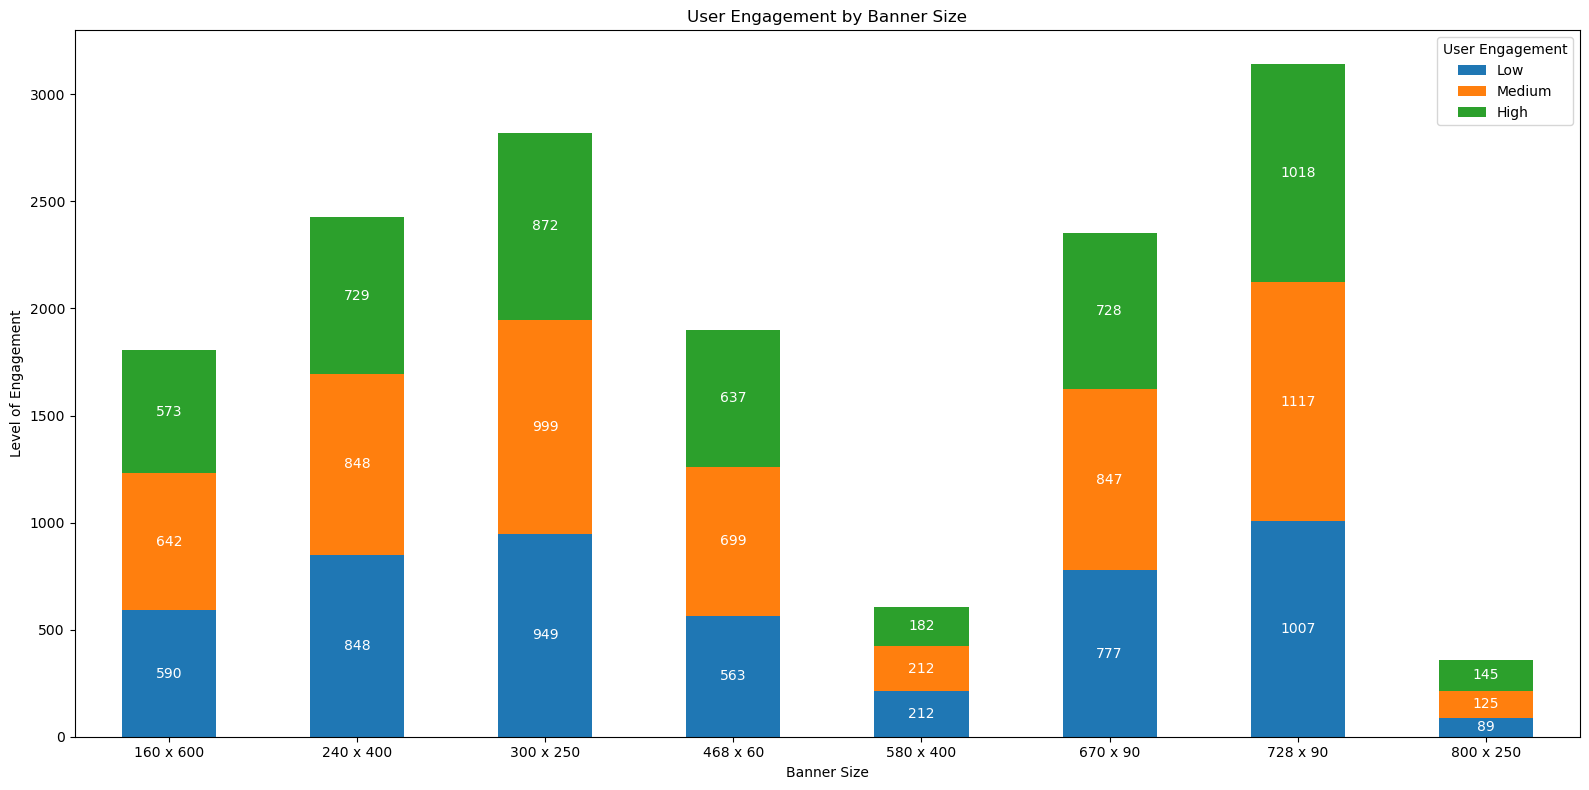

In [32]:
#Creating a visualization of user-engagement vs banner size
user_engagement_banner = df.groupby(['banner_original','user_engagement']).size().unstack()

fig,ax = plt.subplots(figsize=(16,8))
bars = user_engagement_banner.plot(kind='bar', stacked=True, ax=ax)

for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + height/2,
                f'{int(height)}',
                ha='center', va='center', fontsize=10, color='white'
            )

ax.set_title('User Engagement by Banner Size')
ax.set_ylabel('Level of Engagement')
ax.set_xlabel('Banner Size')
ax.set_xticklabels(user_engagement_banner.index, rotation=0)

ax.legend(
    labels = ['Low', 'Medium', 'High'],
    title='User Engagement',
    bbox_to_anchor=(1.0, 1.0),
    loc='upper right'
)

plt.tight_layout()
plt.show()


### Key Observations:

- **728 x 90** recorded the **highest overall engagement** with a total of **3,142 engagements**, including:
  - Low: 1,007  
  - Medium: 1,117  
  - High: 1,018  

- **300 x 250** and **240 x 400** also performed well, with totals of **2,820** and **2,425** respectively.

- **Banner sizes 160 x 600** and **670 x 90** showed moderate performance, each crossing **1,800–2,300** total engagements.

- **468 x 60** had relatively balanced engagement levels, totaling **1,899**, but slightly lower than larger banners.

- **580 x 400** and **800 x 250** had the **lowest engagement**, with only **606** and **359** total interactions respectively.

---

### Insights:

- **Larger and wider banner sizes** like 728 x 90 and 300 x 250 tend to attract more engagement.
- **Very large formats** such as 800 x 250 perform poorly in comparison.
- Engagement appears fairly **evenly distributed across Low, Medium, and High** for top-performing banner sizes, suggesting consistent user interaction.

## Which placement types result in the highest post-click conversion rates?

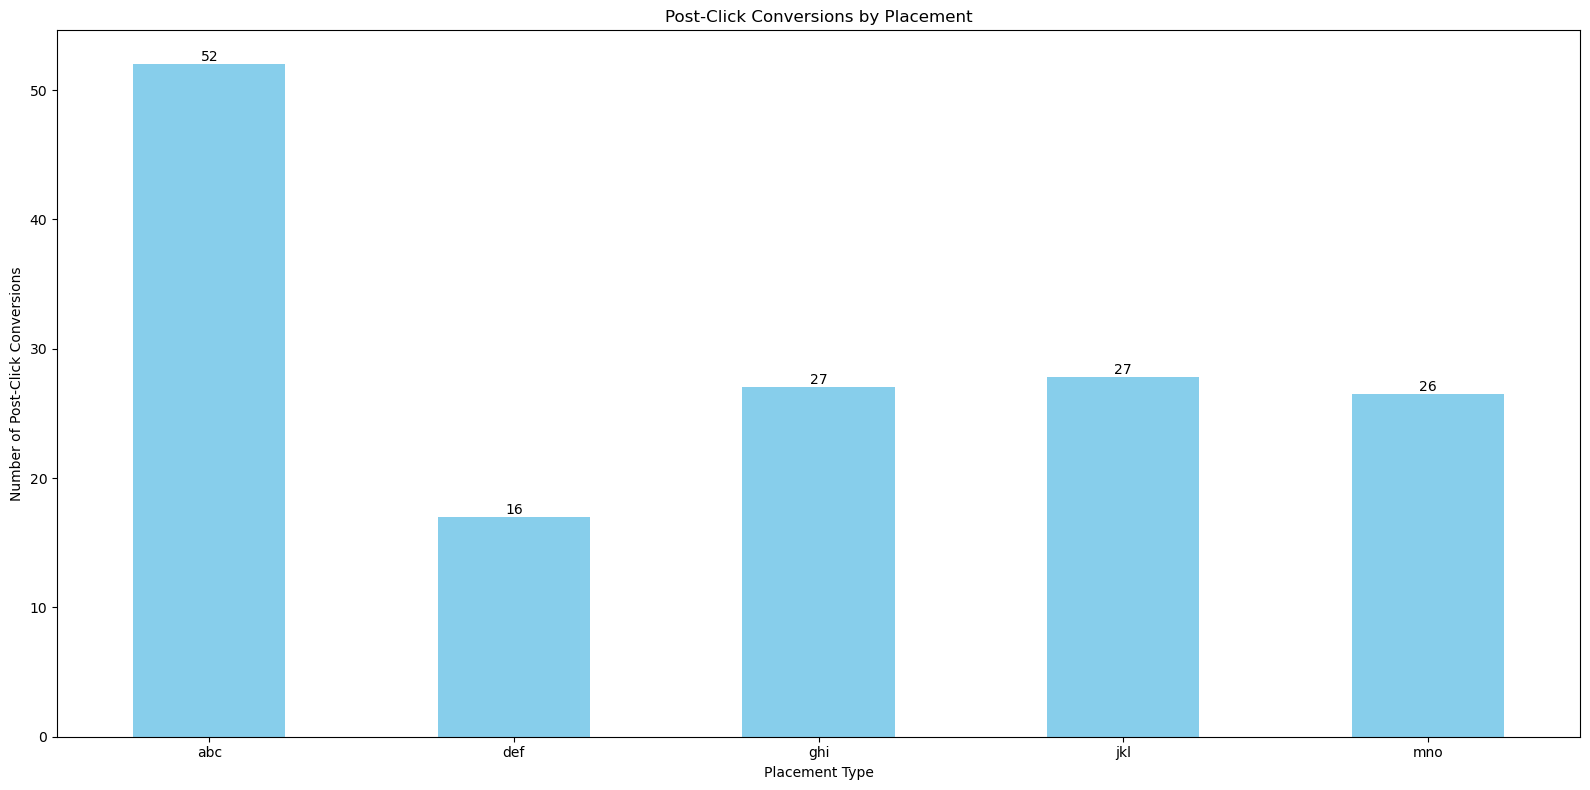

In [35]:
#Creating a visualization of post-click conversion rates by placement
conversion_data = df.groupby('placement_original')[['post_click_conversions', 'clicks']].sum()
conversion_data['conversion_rate'] = (conversion_data['post_click_conversions'] / conversion_data['clicks']) * 100

fig, ax = plt.subplots(figsize=(16, 8))
conversion_data['conversion_rate'].plot(kind='bar', ax=ax, color='skyblue')
bars = ax.patches

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{int(height)}', 
        ha='center', va='bottom', fontsize=10
    )

ax.set_title('Post-Click Conversions by Placement')
ax.set_ylabel('Number of Post-Click Conversions')
ax.set_xlabel('Placement Type')
ax.set_xticks(range(len(conversion_data)))
ax.set_xticklabels(conversion_data.index, rotation=0)

plt.tight_layout()
plt.show()

Based on the visualization of post-click conversions:

- **`abc`** placement type recorded the **highest** number of post-click conversions with **52 conversions**.
- This significantly outperformed the other placements:
  - `ghi` and `jkl`: 27 conversions each  
  - `mno`: 26 conversions  
  - `def`: 16 conversions


## Can we identify any seasonal patterns or fluctuations in displays and clicks throughout the campaign period?

           displays
count  9.100000e+01
mean   2.626568e+06
std    1.390148e+06
min    8.328830e+05
25%    1.407464e+06
50%    2.192525e+06
75%    3.609950e+06
max    6.531564e+06


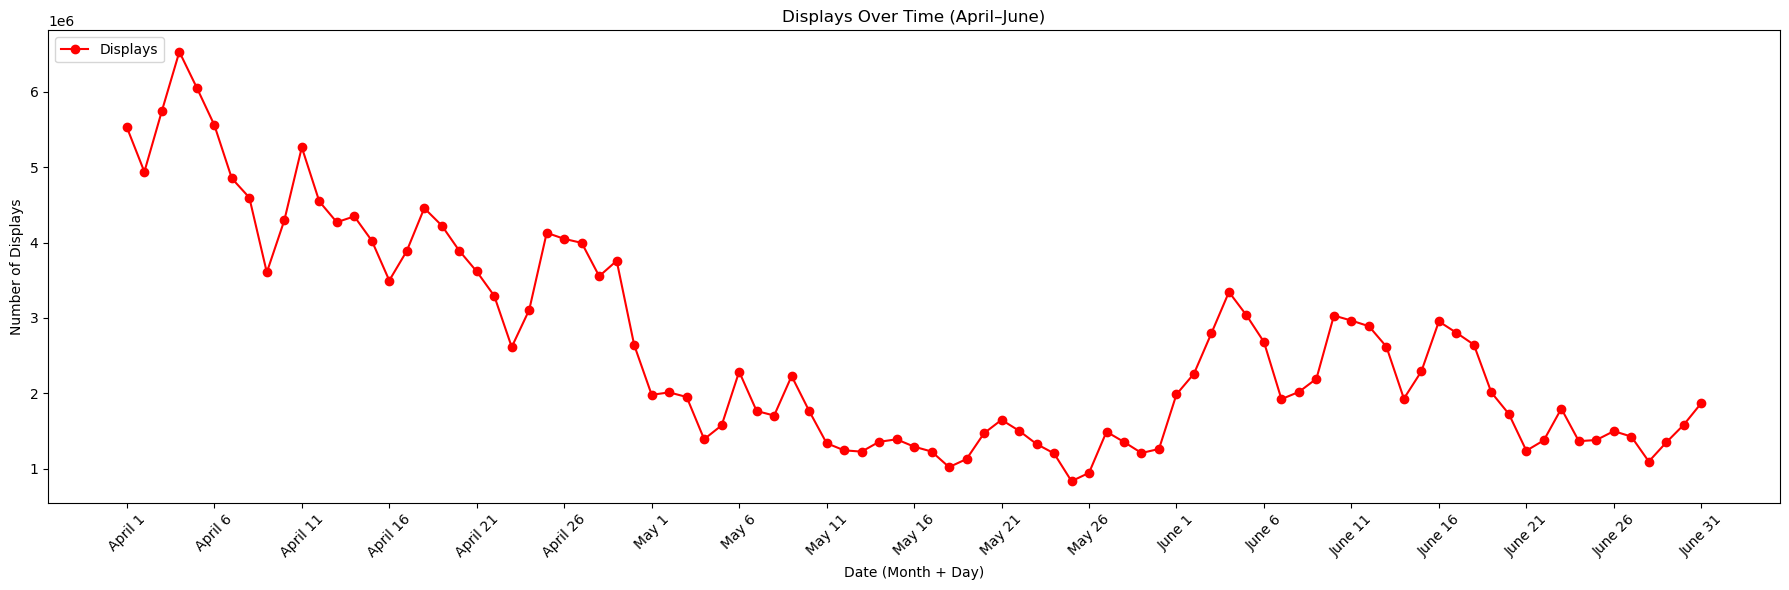

In [38]:
#Creating a visualization of displays overtime
overtime_displays = df.groupby('month_day')['displays'].sum()

sort_key = overtime_displays.index.map(
    lambda x: f"{month_map[x.split()[0]]}-{int(x.split()[1]):02d}"
)

overtime_displays = overtime_displays.to_frame()
overtime_displays['sort_key'] = sort_key

overtime_displays = overtime_displays.sort_values('sort_key').drop(columns='sort_key')

print(overtime_displays.describe())

fig,ax = plt.subplots(figsize=(18, 6))

overtime_displays.plot(kind='line', marker='o', ax=ax, color='red')

ax.set_title('Displays Over Time (April–June)')
ax.set_xlabel('Date (Month + Day)')
ax.set_ylabel('Number of Displays')
ax.set_xticks(range(0, len(overtime_displays), 5))
ax.set_xticklabels(overtime_displays.index[::5], rotation=45)

ax.legend(['Displays'], loc='upper left')

plt.tight_layout()
plt.show()

### Early April Peak
- The number of ad displays began at a **high level** in early April.
- The **peak was observed around April 5**, reaching approximately **6.53 million displays** — the highest in the campaign period.

---

### Steady Decline Through April and May
- After April 5, there is a **consistent downward trend** in display volume.
- **April 6 to May 20** shows a gradual decrease, indicating a **steady decline in ad visibility**.
- Mid-May records the **lowest display counts**, reaching as low as **832,830** — nearly **68% below the early April peak**.

---

### Fluctuating Recovery in June
- June starts with **moderate recovery** in displays, though the volume remains significantly below April’s peak.
- **Intermittent fluctuations** appear throughout June, with multiple **short spikes** but no strong upward trend.
- Daily displays range between **1.1 million to 2.7 million**, indicating **increased volatility**.

---

### Summary Statistics
- **Mean displays per day:** ~2.63 million  
- **Median (50th percentile):** ~2.19 million  
- **Standard deviation:** ~1.39 million (high variability)  
- **Range:** 832,830 (min) to 6.53 million (max)

             clicks
count     91.000000
mean   27393.813187
std    21346.552227
min     5214.000000
25%    10935.000000
50%    16385.000000
75%    47153.500000
max    84224.000000


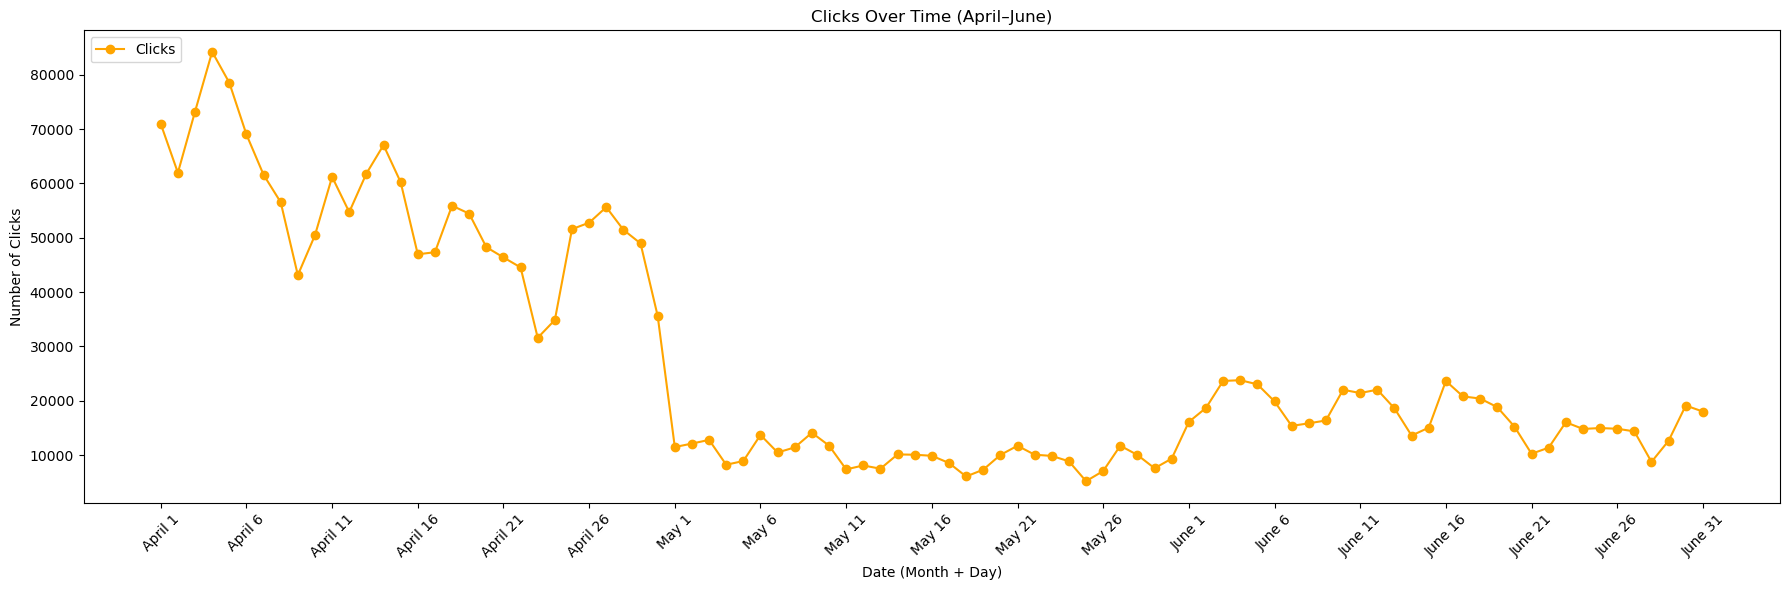

In [40]:
#Creating a visualization of clicks overtime
overtime_clicks = df.groupby('month_day')['clicks'].sum()
sort_key = overtime_clicks.index.map(
    lambda x: f"{month_map[x.split()[0]]}-{int(x.split()[1]):02d}"
)

overtime_clicks = overtime_clicks.to_frame()
overtime_clicks['sort_key'] = sort_key

overtime_clicks = overtime_clicks.sort_values('sort_key').drop(columns='sort_key')

print(overtime_clicks.describe())

fig, ax = plt.subplots(figsize=(18, 6))
overtime_clicks.plot(kind='line', marker='o', ax=ax, color='orange')

ax.set_title('Clicks Over Time (April–June)')
ax.set_xlabel('Date (Month + Day)')
ax.set_ylabel('Number of Clicks')
ax.set_xticks(range(0, len(overtime_clicks), 5))
ax.set_xticklabels(overtime_clicks.index[::5], rotation=45)

ax.legend(['Clicks'], loc='upper left')

plt.tight_layout()
plt.show()

### Gradual Decline in April
- After the initial surge, click volume began a **gradual decline** through mid-to-late April.
- Clicks dropped to approximately **35,000–45,000** by the third week of April, though some **short-term spikes** were visible during this time.

---

### Steep Drop in Early May
- A sharp and noticeable **drop in clicks occurred at the start of May**.
- Click counts fell below **15,000** for most days in May, indicating a **significant decrease in user interaction** with ads.

---

### Stabilization in June
- June displayed **low but more stable click volumes**, ranging between **5,200 (min) and 26,000 clicks**.
- Although no major spikes occurred, the click pattern suggests a **controlled recovery** with consistent albeit reduced performance.

---

### Summary Statistics
- **Mean clicks per day:** ~27,394  
- **Median (50th percentile):** ~16,385  
- **Standard deviation:** ~21,346 (indicating high variability)  
- **Range:** 5,214 (min) to 84,224 (max)